# Case studies

## Gold standard

This dataset contains the 50 most recent articles from [arxiv.org in both the cs.LG and stat.ML categories](https://arxiv.org/list/cs.LG/recent), between the dates 2022-10-24 and 2022-10-25 which had 570 search results. We select articles that belong to cs.LG `or` (cs.LG `and` stat.ML) category. 

"Repository evaluation" is performed on articles that provided links to their code repository and "Paper evaluation" is performed on all 50 articles by parsing the `.tex` files from their corresponding arXiv links. `reproscreener` is evaluated this `gold_standard` dataset and the results are shown below.

In [20]:
import pandas as pd
import numpy as np
from IPython.display import display
from pathlib import Path
import sys
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

sys.path.append(str(Path.cwd().parent / "src/reproscrener"))

from reproscreener.plots.repo_eval_heatmaps import prepare_repo_heatmap_df, plot_repo_heatmap, plot_repo_clustermap
from reproscreener.plots.tex_eval_heatmaps import prepare_tex_heatmap_df, plot_tex_heatmap
from reproscreener.repo_eval import get_all_repo_eval_dict
from reproscreener.tex_eval import get_all_tex_eval_dict
# from reproscreener.gold_standard import get_gold_standard_ids_from_manual
from reproscreener.gdrive_downloader import gdrive_get_manual_eval
from reproscreener.utils import reverse_mapping

def summary_table(df, column, number_of_papers):
    variable_counts = df[column].value_counts()
    percentage = variable_counts / number_of_papers * 100

    summary_table = pd.DataFrame({"Count": variable_counts, "Percentage": percentage})
    summary_table = summary_table.sort_values(by="Count", ascending=False)
    summary_table["Percentage"] = summary_table["Percentage"].map("{:.2f}%".format)
    return summary_table

In [21]:
path_repo = Path("../case-studies/arxiv-corpus/gold_standard/repo")
path_tex = Path("../case-studies/arxiv-corpus/gold_standard/source")
path_manual = Path("../case-studies/arxiv-corpus/manual_eval.csv")

manual_eval = gdrive_get_manual_eval(overwrite=False, manual_path=path_manual)
gold_standard_ids = manual_eval["paper"].unique()

Manual eval file already exists, use the overwrite flag to download

## Repo evaluation

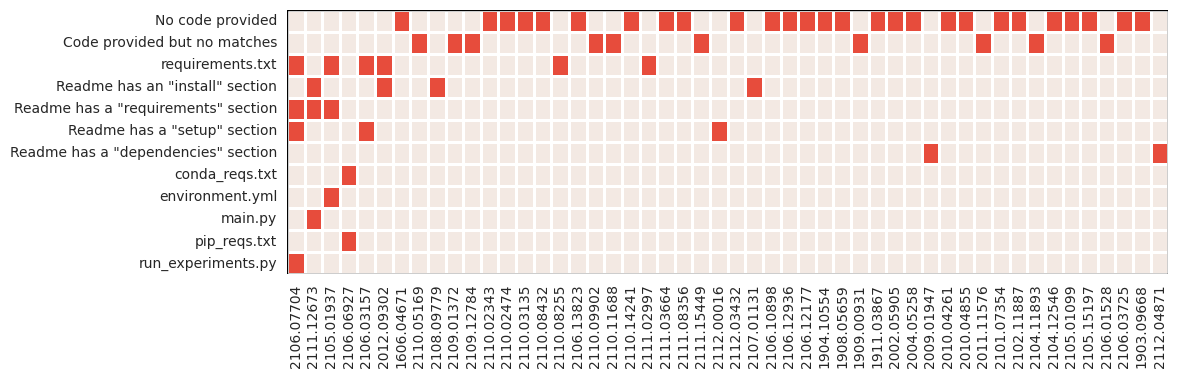

In [22]:
repo_evaluation_dict = get_all_repo_eval_dict(path_repo)
repo_heatmap_df = prepare_repo_heatmap_df(repo_evaluation_dict, gold_standard_ids)
plot_repo_heatmap(repo_heatmap_df, filename="heatmap_repo_eval.png", path_plots=None, sort_x=True, sort_y=True)

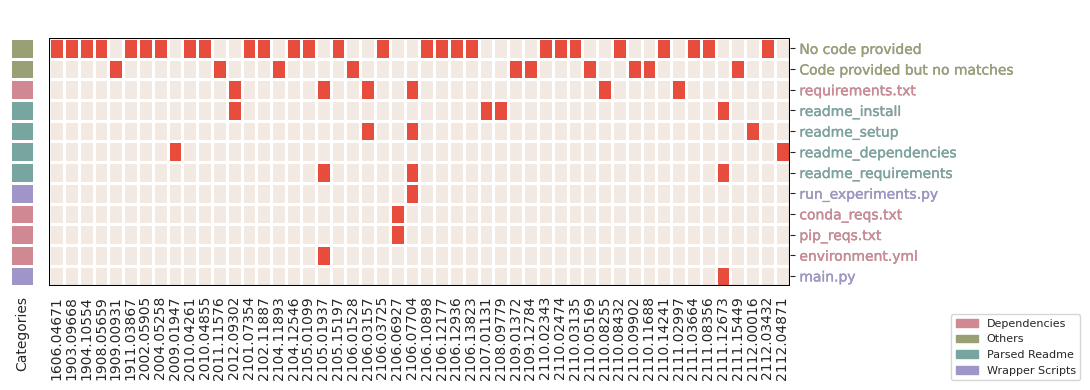

In [23]:
plot_repo_clustermap(repo_heatmap_df, filename="clustermap_repo_eval.png", path_plots=None)

In [24]:
repo_heatmap_df.head(10).drop(columns=["Display_Label"])

,Paper_ID,Matched_File,Category
0,1606.04671,No code provided,Others
1,1903.09668,No code provided,Others
2,1904.10554,No code provided,Others
3,1908.05659,No code provided,Others
4,1909.00931,Code provided but no matches,Others
5,1911.03867,No code provided,Others
6,2002.05905,No code provided,Others
7,2004.05258,No code provided,Others
8,2009.01947,readme_dependencies,Parsed Readme
9,2010.04261,No code provided,Others


In [25]:
number_of_papers = len(repo_heatmap_df["Paper_ID"].unique())
print(f"Total number of papers in the gold standard: {len(gold_standard_ids)}")

Total number of papers in the gold standard: 50


In [26]:
summary_table(repo_heatmap_df, "Matched_File", number_of_papers)

,Count,Percentage
No code provided,27,54.00%
Code provided but no matches,10,20.00%
requirements.txt,6,12.00%
readme_install,4,8.00%
readme_requirements,3,6.00%
readme_setup,3,6.00%
readme_dependencies,2,4.00%
environment.yml,1,2.00%
conda_reqs.txt,1,2.00%
pip_reqs.txt,1,2.00%


The variables are grouped by the following categories defined in `reverse_mapping`:

- **Dependencies**: Files related to the dependencies of the repository.
- **Wrapper Scripts**: Files that combine various stages of the workflow.
- **Parsed Readme**: Headers present in the README file of the repository that provide instructions about the code/data.
- **Others**: Contains `No code provided` or `Code provided but no matches`. The latter is used when the code is provided but files from any of the other categories were found in the repository.

In [27]:
reverse_mapping_df = pd.DataFrame.from_dict(reverse_mapping, orient='index', columns=['Category'])
reverse_mapping_df.index.name = 'Matched_File'
reverse_mapping_df

,Category
Matched_File,
requirements.txt,Dependencies
setup.py,Dependencies
environment.yml,Dependencies
pyproject.toml,Dependencies
pip_reqs.txt,Dependencies
conda_reqs.txt,Dependencies
run.py,Wrapper Scripts
run.sh,Wrapper Scripts
main.py,Wrapper Scripts


In [28]:
summary_table(repo_heatmap_df, "Category", number_of_papers)

,Count,Percentage
Others,37,74.00%
Parsed Readme,12,24.00%
Dependencies,9,18.00%
Wrapper Scripts,2,4.00%


In [29]:
no_code_provided_counts = len(repo_heatmap_df[repo_heatmap_df["Matched_File"] == "No code provided"])
code_provided_counts = number_of_papers - no_code_provided_counts
code_provided_percentage = (code_provided_counts / number_of_papers) * 100
print(f"{code_provided_counts}/{number_of_papers} ({code_provided_percentage:.2f}%) of the papers have provided some code")

23/50 (46.00%) of the papers have provided some code


## Tex Evaluation

In [30]:
tex_evaluation_dict = get_all_tex_eval_dict(path_tex)
tex_heatmap_df = prepare_tex_heatmap_df(tex_evaluation_dict, gold_standard_ids)

Output()

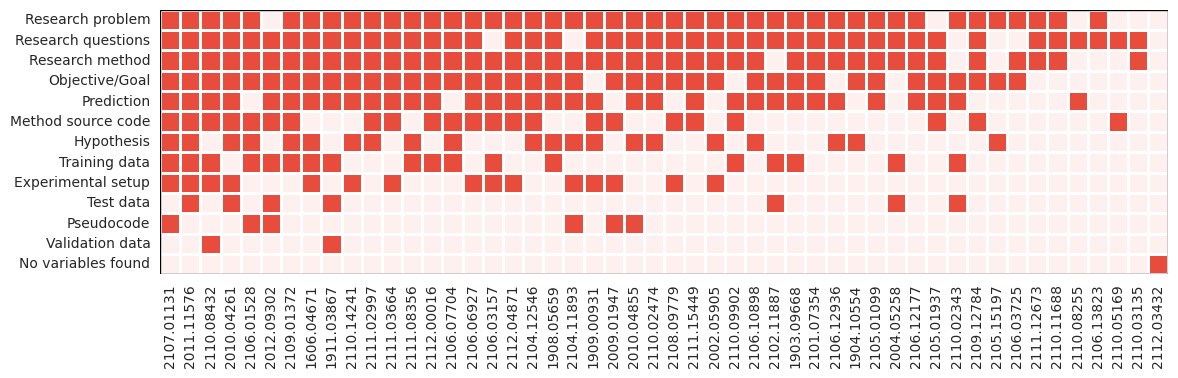

In [31]:
plot_tex_heatmap(tex_heatmap_df, filename="heatmap_tex_eval.png", path_plots=None, sort_x=True, sort_y=True)

In [32]:
tex_heatmap_df.head(10)

,Paper_ID,Found_Variable
0,1606.04671,Research method
1,1606.04671,Hypothesis
2,1606.04671,Prediction
3,1606.04671,Research questions
4,1606.04671,Objective/Goal
5,1606.04671,Research problem
6,1606.04671,Experimental setup
7,1606.04671,Training data
8,1903.09668,Research method
9,1903.09668,Objective/Goal


In [33]:
summary_table(tex_heatmap_df, "Found_Variable", number_of_papers)

,Count,Percentage
Research questions,44,88.00%
Research problem,44,88.00%
Research method,43,86.00%
Objective/Goal,39,78.00%
Prediction,34,68.00%
Method source code,23,46.00%
Hypothesis,21,42.00%
Training data,18,36.00%
Experimental setup,15,30.00%
Test data,7,14.00%


## Comparision with manual evaluation

### Repo evaluation comparison

In [40]:
# Prepare mapping dictionary for 'parsed_readme'
repo_map_dict = {
    "Dependencies": "software_dependencies",
    "Wrapper Scripts": "wrapper_scripts",
    # Add other mappings if necessary. You may not have direct mappings for 'Parsed Readme' and 'Others'
}

repo_heatmap_df['Mapped_Category'] = repo_heatmap_df['Category'].map(repo_map_dict)
repo_heatmap_df['Value'] = 1  # Assign 1 to found categories
repo_heatmap_pivot = repo_heatmap_df.pivot_table(values='Value', index='Paper_ID', columns='Mapped_Category', fill_value=0)

# For 'Parsed Readme' category, we have to adjust values according to 'Matched_File' column
parsed_readme_mask = repo_heatmap_df['Mapped_Category'] == 'parsed_readme'
repo_heatmap_pivot.loc[repo_heatmap_df[parsed_readme_mask]['Paper_ID'], 'parsed_readme'] = repo_heatmap_df[parsed_readme_mask]['Matched_File']

# Convert the 'parsed_readme' column in manual_eval to the same format
manual_eval['parsed_readme'] = manual_eval['parsed_readme'].apply(lambda x: 'Parsed Readme' if x else 'No Readme')

repo_heatmap_pivot['no_code_provided'] = ((repo_heatmap_df['Category'] == 'Others') & (repo_heatmap_df['Matched_File'] == 'No code provided')).astype(int)
repo_heatmap_pivot['code_provided_no_match'] = ((repo_heatmap_df['Category'] == 'Others') & (repo_heatmap_df['Matched_File'] == 'Code provided but no matches')).astype(int)


for col in repo_map_dict.values():
    print(f'\nMetrics for: {col}')
    if col in repo_heatmap_pivot.columns:
        if col != 'parsed_readme':
            manual_eval[col] = pd.to_numeric(manual_eval[col], errors='coerce')
            
            y_auto = repo_heatmap_pivot[col]
            y_manual = manual_eval.set_index('paper')[col]
            
            eval_df = pd.concat([y_auto, y_manual], axis=1, join='inner')
            eval_df.columns = ['auto', 'manual']
            eval_df.dropna(inplace=True)
            
            precision = precision_score(eval_df['manual'], eval_df['auto'])
            recall = recall_score(eval_df['manual'], eval_df['auto'])
            f1 = f1_score(eval_df['manual'], eval_df['auto'])
            accuracy = accuracy_score(eval_df['manual'], eval_df['auto'])
            
            print(f'Precision: {precision}\nRecall: {recall}\nF1-score: {f1}\nAccuracy: {accuracy}')
        else:
            # Now, you can calculate the agreement percentage
            agreement = (repo_heatmap_pivot['parsed_readme'] == manual_eval.set_index('paper')['parsed_readme']).mean()
            print(f'Agreement percentage: {agreement*100:.2f}%')
    else:
        print('This column is not evaluated by RepoScreener.')


Metrics for: software_dependencies
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy: 1.0

Metrics for: wrapper_scripts
Precision: 1.0
Recall: 0.2857142857142857
F1-score: 0.4444444444444445
Accuracy: 0.375


### Tex evaluation comparison

In [36]:
# Define a mapping from tex heatmap to manual eval
map_dict = {
    "Research questions": "research_questions",
    "Research problem": "problem",
    "Research method": "research_method",
    "Objective/Goal": "objective",
    "Prediction": "prediction",
    "Method source code": "code_avail_article",
    "Hypothesis": "hypothesis",
    "Training data": "dataset",
    "Experimental setup": "experiment_setup",
}

# Apply mapping and pivot the dataframe
tex_heatmap_df['Mapped_Variable'] = tex_heatmap_df['Found_Variable'].map(map_dict)
tex_heatmap_df['Value'] = 1  # Assign 1 to found variables
tex_heatmap_pivot = tex_heatmap_df.pivot_table(values='Value', index='Paper_ID', columns='Mapped_Variable', fill_value=0)

tex_heatmap_pivot

Mapped_Variable,code_avail_article,dataset,experiment_setup,hypothesis,objective,prediction,problem,research_method,research_questions
Paper_ID,,,,,,,,,
1606.04671,0,1,1,1,1,1,1,1,1
1903.09668,0,1,0,0,1,1,1,1,1
1904.10554,0,0,0,1,1,0,1,1,1
1908.05659,0,1,0,1,1,1,1,1,1
1909.00931,1,0,1,1,0,1,1,1,1
1911.03867,0,1,0,0,1,1,1,1,1
2002.05905,0,0,1,1,1,0,1,1,1
2004.05258,0,1,0,0,0,0,1,1,1
2009.01947,1,0,1,0,1,0,1,1,1


In [37]:
# Convert the columns in manual_eval to numeric values, if they are not already
for col in map_dict.values():
    manual_eval[col] = pd.to_numeric(manual_eval[col], errors='coerce')

# Iterate over all relevant columns and calculate metrics
for col in map_dict.values():
    print(f'\nMetrics for: {col}')
    if col in tex_heatmap_pivot.columns:
        y_auto = tex_heatmap_pivot[col]
        y_manual = manual_eval.set_index('paper')[col]
        
        # Merge manual and automatic evaluations
        eval_df = pd.concat([y_auto, y_manual], axis=1, join='inner')
        eval_df.columns = ['auto', 'manual']
        eval_df.dropna(inplace=True)
        
        # Calculate metrics
        precision = precision_score(eval_df['manual'], eval_df['auto'])
        recall = recall_score(eval_df['manual'], eval_df['auto'])
        f1 = f1_score(eval_df['manual'], eval_df['auto'])
        accuracy = accuracy_score(eval_df['manual'], eval_df['auto'])
        
        print(f'Precision: {precision}\nRecall: {recall}\nF1-score: {f1}\nAccuracy: {accuracy}')
    else:
        print('This column is not evaluated by Reproscreener.')



Metrics for: research_questions
Precision: 0.06818181818181818
Recall: 1.0
F1-score: 0.1276595744680851
Accuracy: 0.16326530612244897

Metrics for: problem
Precision: 0.3181818181818182
Recall: 0.9333333333333333
F1-score: 0.47457627118644075
Accuracy: 0.3673469387755102

Metrics for: research_method
Precision: 0.20930232558139536
Recall: 0.9
F1-score: 0.339622641509434
Accuracy: 0.2857142857142857

Metrics for: objective
Precision: 0.10256410256410256
Recall: 1.0
F1-score: 0.18604651162790695
Accuracy: 0.2857142857142857

Metrics for: prediction
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Accuracy: 0.30612244897959184

Metrics for: code_avail_article
Precision: 0.782608695652174
Recall: 0.8181818181818182
F1-score: 0.8
Accuracy: 0.8163265306122449

Metrics for: hypothesis
Precision: 0.23809523809523808
Recall: 0.625
F1-score: 0.3448275862068965
Accuracy: 0.6122448979591837

Metrics for: dataset
Precision: 0.6666666666666666
Recall: 0.3870967741935484
F1-score: 0.4897959183673469
Accurac

/home/adb/.pyenv/versions/3.9.13/envs/repro-screener/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
